In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score
import openpyxl
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Importing Dataset
maxw=pd.read_csv("C:\\Users\\C KIRANMAYI\\Downloads\\2020Yield\\Phase 1\\csv\\max_wind_speed.csv")

In [3]:
maxw

,Year,Month,past,pasttopast,max_wind_speed
0,1990,1,8.096250,7.445000,9.781250
1,1990,2,7.451250,7.010000,8.188750
2,1990,3,7.526250,7.486250,7.855625
3,1990,4,8.113125,7.595000,9.368125
4,1990,5,9.887500,9.198750,11.914375
...,...,...,...,...,...
355,2019,8,10.900000,8.523750,10.762500
356,2019,9,8.300625,9.542500,8.537500
357,2019,10,7.708125,7.771875,7.173125
358,2019,11,9.888750,9.457500,8.215625


In [4]:
maxw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            360 non-null    int64  
 1   Month           360 non-null    int64  
 2   past            360 non-null    float64
 3   pasttopast      360 non-null    float64
 4   max_wind_speed  360 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 14.2 KB


In [5]:
#Creating correlation for precipitation
#Creating the correlation matrix for the features
corr_matrix=maxw.corr()
corr_matrix

,Year,Month,past,pasttopast,max_wind_speed
Year,1.000000e+00,2.844429e-15,-0.023274,0.006666,-0.029879
Month,2.844429e-15,1.000000e+00,0.301794,0.291308,0.297877
past,-2.327368e-02,3.017944e-01,1.000000,0.449788,0.456418
pasttopast,6.665708e-03,2.913077e-01,0.449788,1.000000,0.510111
max_wind_speed,-2.987918e-02,2.978772e-01,0.456418,0.510111,1.000000


In [6]:
mask = np.zeros_like(corr_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)]= True

c:\Users\C KIRANMAYI\anaconda3\envs\myenv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


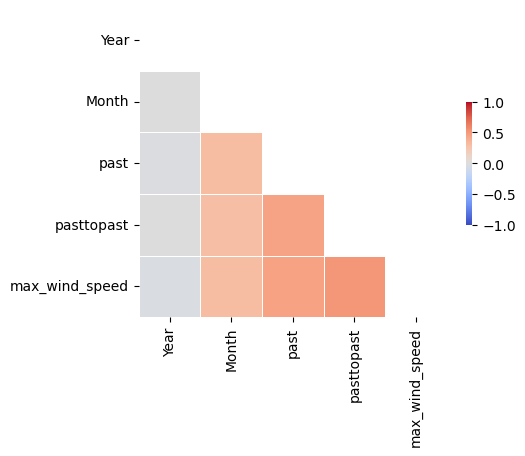

In [7]:
f, ax = plt.subplots(figsize=(5, 4)) 
heatmap = sns.heatmap(corr_matrix, mask = mask,square = True,linewidths = .5, cmap = 'coolwarm', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},vmin = -1, vmax = 1,annot = True,annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [8]:
maxw=maxw.drop(['Year','Month'],axis=1)

In [9]:
maxw.shape

(360, 3)

In [10]:
X=maxw.drop('max_wind_speed',axis=1)
y=maxw.max_wind_speed

In [11]:
X

,past,pasttopast
0,8.096250,7.445000
1,7.451250,7.010000
2,7.526250,7.486250
3,8.113125,7.595000
4,9.887500,9.198750
...,...,...
355,10.900000,8.523750
356,8.300625,9.542500
357,7.708125,7.771875
358,9.888750,9.457500


In [12]:
y

0       9.781250
1       8.188750
2       7.855625
3       9.368125
4      11.914375
         ...    
355    10.762500
356     8.537500
357     7.173125
358     8.215625
359     8.646250
Name: max_wind_speed, Length: 360, dtype: float64

In [13]:
X.shape

(360, 2)

In [14]:
y.shape

(360,)

In [15]:
# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshaping data for LSTM/GRU/RNN (samples, timesteps, features)
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], X_scaled.shape[1], 1))

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

### GRU

In [16]:
def create_gru_model(units=64):
    model = Sequential()
    model.add(GRU(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

In [17]:
gru_model = KerasRegressor(build_fn=create_gru_model, verbose=0)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_3032\2098133132.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  gru_model = KerasRegressor(build_fn=create_gru_model, verbose=0)


In [18]:
# Define the hyperparameter grid
gru_param_grid = {
    'units': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [19]:
gru_grid = GridSearchCV(estimator=gru_model, param_grid=gru_param_grid, cv=3, scoring='neg_mean_squared_error')

In [20]:
gru_grid_result = gru_grid.fit(X_train, y_train)

In [21]:
print(f"Best GRU params: {gru_grid_result.best_params_}")
print(f"Best GRU score: {gru_grid_result.best_score_}")

Best GRU params: {'batch_size': 16, 'epochs': 100, 'units': 128}
Best GRU score: -1.3137855678266035


### LSTM

In [22]:
def create_lstm_model(units=64):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

In [23]:
lstm_model = KerasRegressor(build_fn=create_lstm_model, verbose=0)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_3032\1916978622.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_model = KerasRegressor(build_fn=create_lstm_model, verbose=0)


In [24]:
# Define the hyperparameter grid
lstm_param_grid = {
    'units': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [25]:
lstm_grid = GridSearchCV(estimator=lstm_model, param_grid=lstm_param_grid, cv=3, scoring='neg_mean_squared_error')

In [26]:
lstm_grid_result = lstm_grid.fit(X_train, y_train)

In [27]:
print(f"Best LSTM params: {lstm_grid_result.best_params_}")
print(f"Best LSTM score: {lstm_grid_result.best_score_}")

Best LSTM params: {'batch_size': 16, 'epochs': 100, 'units': 128}
Best LSTM score: -1.3261187178028147


### RNN

In [28]:
def create_rnn_model(units=64):
    model = Sequential()
    model.add(SimpleRNN(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

In [29]:
rnn_model = KerasRegressor(build_fn=create_rnn_model, verbose=0)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_3032\361697586.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  rnn_model = KerasRegressor(build_fn=create_rnn_model, verbose=0)


In [30]:
rnn_param_grid = {
    'units': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [31]:
rnn_grid = GridSearchCV(estimator=rnn_model, param_grid=rnn_param_grid, cv=3, scoring='neg_mean_squared_error')

In [32]:
rnn_grid_result = rnn_grid.fit(X_train, y_train)

In [33]:
print(f"Best SimpleRNN params: {rnn_grid_result.best_params_}")
print(f"Best SimpleRNN score: {rnn_grid_result.best_score_}")

Best SimpleRNN params: {'batch_size': 16, 'epochs': 100, 'units': 128}
Best SimpleRNN score: -1.308939024684856


In [34]:
# Evaluating GRU model on test data
best_gru_model = gru_grid_result.best_estimator_
y_pred_gru = best_gru_model.predict(X_test)
mse_gru = mean_squared_error(y_test, y_pred_gru)


print(f"GRU Model - MSE: {mse_gru}")

# Evaluating LSTM model on test data
best_lstm_model = lstm_grid_result.best_estimator_
y_pred_lstm = best_lstm_model.predict(X_test)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)


print(f"LSTM Model - MSE: {mse_lstm}")

# Evaluating SimpleRNN model on test data
best_rnn_model = rnn_grid_result.best_estimator_
y_pred_rnn = best_rnn_model.predict(X_test)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)


print(f"SimpleRNN Model - MSE: {mse_rnn}")


GRU Model - MSE: 1.1401228725902584
LSTM Model - MSE: 1.0489807779973526
SimpleRNN Model - MSE: 1.0825089916762753


## RNN is sutaible for MaxWind with least MSE

In [44]:
maxw2021=pd.read_csv("C:\\Users\\C KIRANMAYI\\Downloads\\2020Yield\\Phase 1\\csv\\2020\\max_wind_speed.csv")

In [45]:
maxw2021 = maxw2021.drop(['Year', 'Month'],axis=1)

In [46]:
maxw2021

,past,pasttopast
0,7.835625,7.130625
1,8.195625,7.284375
2,7.484375,7.518125
3,8.331875,7.283750
4,8.723125,9.173750
5,10.616250,10.346250
6,9.272500,10.533125
7,10.762500,10.900000
8,8.537500,8.300625
9,7.173125,7.708125


In [47]:
maxw2020_pred=[]

In [48]:
maxw2021_scaled = scaler.transform(maxw2021)

# Reshape for prediction
maxw2021_scaled = np.reshape(maxw2021_scaled, (maxw2021_scaled.shape[0], maxw2021_scaled.shape[1], 1))

In [49]:
best_model = lstm_grid_result.best_estimator_

maxw2020_pred=best_model.predict(maxw2021_scaled)

In [50]:
maxw2020_pred

array([ 8.126414 ,  8.307919 ,  8.071788 ,  8.362447 ,  8.957358 ,
        9.947708 ,  9.486627 , 10.127984 ,  8.681108 ,  7.9859366,
        8.9181   ,  9.059648 ], dtype=float32)

In [1]:
maxwind_data=pd.DataFrame(data=maxw2020_pred)
maxwind_data

,0
0,7.126414
1,8.307919
2,7.071788
3,7.362447
4,9.957358
5,8.947708
6,9.486627
7,10.127984
8,9.681108
9,7.985937


In [52]:
maxwind_data.to_csv("C:\\Users\\C KIRANMAYI\\Downloads\\2020Yield\\Phase 1\\csv\\2020\\max_wind_speed1.csv")